In [5]:
#Import Required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
#read data from file
df= pd.read_csv(r'C:\Users\dell\Desktop\x_data.csv')

In [29]:
class Kmeans():
    """This class implements Kmeans ++ algorithms for clustering.
    
    This class implements Kmeans ++ algorithms for clustering.This
    reduces data to 2D then applies k_means ++ algorithm.
    """
    def __init__(self,num_clusters = 3,max_iter=500):
        """This class method initializes K means clustering algorith and is the default constructor.
        
        Args:
            num_clusters(int): A value specified the numbers of clusters for this model
        
        Returns:
            None
        """
        self.__centroids = None #centroids for fitted cluster
        self.__k = num_clusters #THe numbers of clusters
        self.__iterations = max_iter #the number of iteration
    def get_centroids(self):
        """This class methods returns centroids for this K means model
        
        Args:
            None
            
        Returns:
            centroids(numpy.array): Centroids for K means model
        """
        return self.__centroids
    def __get_initial_centroids(self,features_matrix):
        """This class methods initializes centroids.
        
        This class methods initializes centroids by random selecting one of the points from 
        given features matrix.
        
        Args:
            features_matrix(numpy.array): A numpy array containing examples by features  [n,m].
            k
        """
        rand_indexes = np.random.randint(features_matrix.shape[0],size=self.__k) #get random indexes
        self.__centroids = features_matrix[rand_indexes] #get centroids from data points with the randomly generated index
        self.__centroids.shape = (self.__k,features_matrix.shape[1]) #reshape centroids
    def __revise_cluster_centers(self,features_matrix,cluster_labels):
        """This class method updates the centroids.
        
        THis clas methods updates the centroids by caculating mean for given cluster labels and features_matrix.
        
        Args:
            features_matrix(numpy.array): This the trainning data point with examples X features [n,m].
            cluster_labels(numpy.array): An array with previous cluster labels, [n]
            
        Returns:
            None
        """
        for i in range(0,self.__k):
            dpoints = features_matrix[cluster_labels==i] #get datapoints for given labels
            self.__centroids[i,:] = np.mean(dpoints,axis=0) #calulate mean and update centroids
    def fit(self,features_matrix,verbose=False):
        """This class methods trains the K means model.
        
        Args:
            features_matrix(numpy.array): This the trainning data point with examples X features [n,m].
            verbose(boolean): A flag indicating whter moddel fitting process messages should be printed or not
        """
        self.__get_initial_centroids(features_matrix) #get initial centroids

        if verbose:
            print("Initial Centroids Are: ", self.__centroids)#print centroids
        
        distances = np.zeros((features_matrix.shape[0],self.__k),float)

        for i in range(0,self.__iterations): #loop for specified itertations

            for j in range(0,self.__k): #compute disances to all centroids
                distances[:,j] = np.linalg.norm((self.__centroids[j,:]-features_matrix),axis=1)
                
            cluster_labels = np.argmin(distances,axis=1) #get cluster labels
         
            self.__revise_cluster_centers(features_matrix,cluster_labels)  #revise cluster labels
            
            if verbose: #print centroids
                print(" Iteration: ",i, "Revised Centroids: \n",self.__centroids)
    def predict_labels(self,features_matrix):
        """This class methods predicts labels for given features_matrix
        
        Args:
            features_matrix(numpy.array): This the data point with examples X features [n,m] whose label is to be predicited.
        """
        distances = np.zeros((features_matrix.shape[0],self.__k),float)
        for j in range(0,self.__k): #compute disances to all centroids
            distances[:,j] = np.linalg.norm((self.__centroids[j,:]-features_matrix),axis=1)
        cluster_labels = np.argmin(distances,axis=1) #get cluster labels
        return cluster_labels

In [45]:
def visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k):
    """This is a helper method that visualizes K means clusters

    Args:
        features_matrix(numpy.array): This the data point with examples X features [n,m].
        centroids(numpy.array): centroids of k means clustering
        cluster_labels(numpy.array): predicted cluster labels for given features_matrix
        k(int): the numbers of clusters
    """
    fig, ax = plt.subplots()
    for i in range(0,k):
        dpoints = features_matrix[cluster_labels==i]
        ax.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50)
        ax.scatter(centroids[i,0],centroids[i,1],centroids[i,2],marker="o",s=100) #plot points

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Clusters and Centroids")

In [40]:
model = Kmeans(num_clusters=3,max_iter=100)

In [33]:
features_matrix = df.to_numpy()
features_matrix

array([[ 3.6 , 10.52],
       [ 4.32, 11.34],
       [ 5.37, 12.05],
       [ 3.98,  7.44],
       [ 4.93, 10.21],
       [ 5.18, 10.14],
       [ 4.17,  5.85],
       [ 3.69,  8.27],
       [ 5.19, 10.06],
       [ 5.99,  6.44],
       [ 4.35, 10.75],
       [ 4.67, 12.59],
       [ 6.65,  7.41],
       [ 4.44, 12.93],
       [ 4.49, 17.14],
       [ 7.4 ,  9.44],
       [ 3.47,  9.38],
       [ 5.8 ,  9.1 ],
       [ 3.  ,  4.18],
       [ 4.4 ,  7.54],
       [ 6.5 , 11.74],
       [ 6.22,  9.44],
       [ 4.1 , 11.27],
       [ 4.55,  9.97],
       [ 5.08,  9.87],
       [ 3.74, 11.08],
       [ 5.55,  7.8 ],
       [ 7.23, 10.82],
       [ 3.64, 10.58],
       [ 3.02,  7.59],
       [ 5.29,  6.72],
       [ 4.88,  8.96],
       [ 6.8 , 15.44],
       [ 4.84, 13.17],
       [ 4.95, 12.31],
       [ 4.81,  9.34],
       [ 4.01, 10.5 ],
       [ 5.67,  9.66],
       [ 3.68, 12.17],
       [ 6.17, 11.05],
       [ 5.01,  6.16],
       [ 5.5 , 11.62],
       [ 4.45, 11.8 ],
       [ 4.

In [41]:
model.fit(features_matrix)

In [42]:
centroids = model.get_centroids()

In [43]:
cluster_labels = model.predict_labels(features_matrix)

In [64]:
print("Initial k means are")
print('means[0] is(',centroids[0],',0)''\n''means[1] is(',centroids[1],',1)''\n''means[2] is(',centroids[2],',2)')

Initial k means are
means[0] is( [5.20980769 9.77475962] ,0)
means[1] is( [10.79162602 10.73878049] ,1)
means[2] is( [ 7.42214286 15.08434524] ,2)


In [ ]:
# visualize_k_means_clustering(features_matrix,centroids,cluster_labels,k=3)



After 5000 Iterations, Cluster Labels for Data: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 2 1 1 0 1 1 1 1 1 1 1 1 1 2 1 0 1 0 1 1 1 1 1 1 1 0 2 1 1 1 0 1 0 1 0 1 2
 1 0 1 0 1 1 1 1 0 2 1 1 1 2 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2

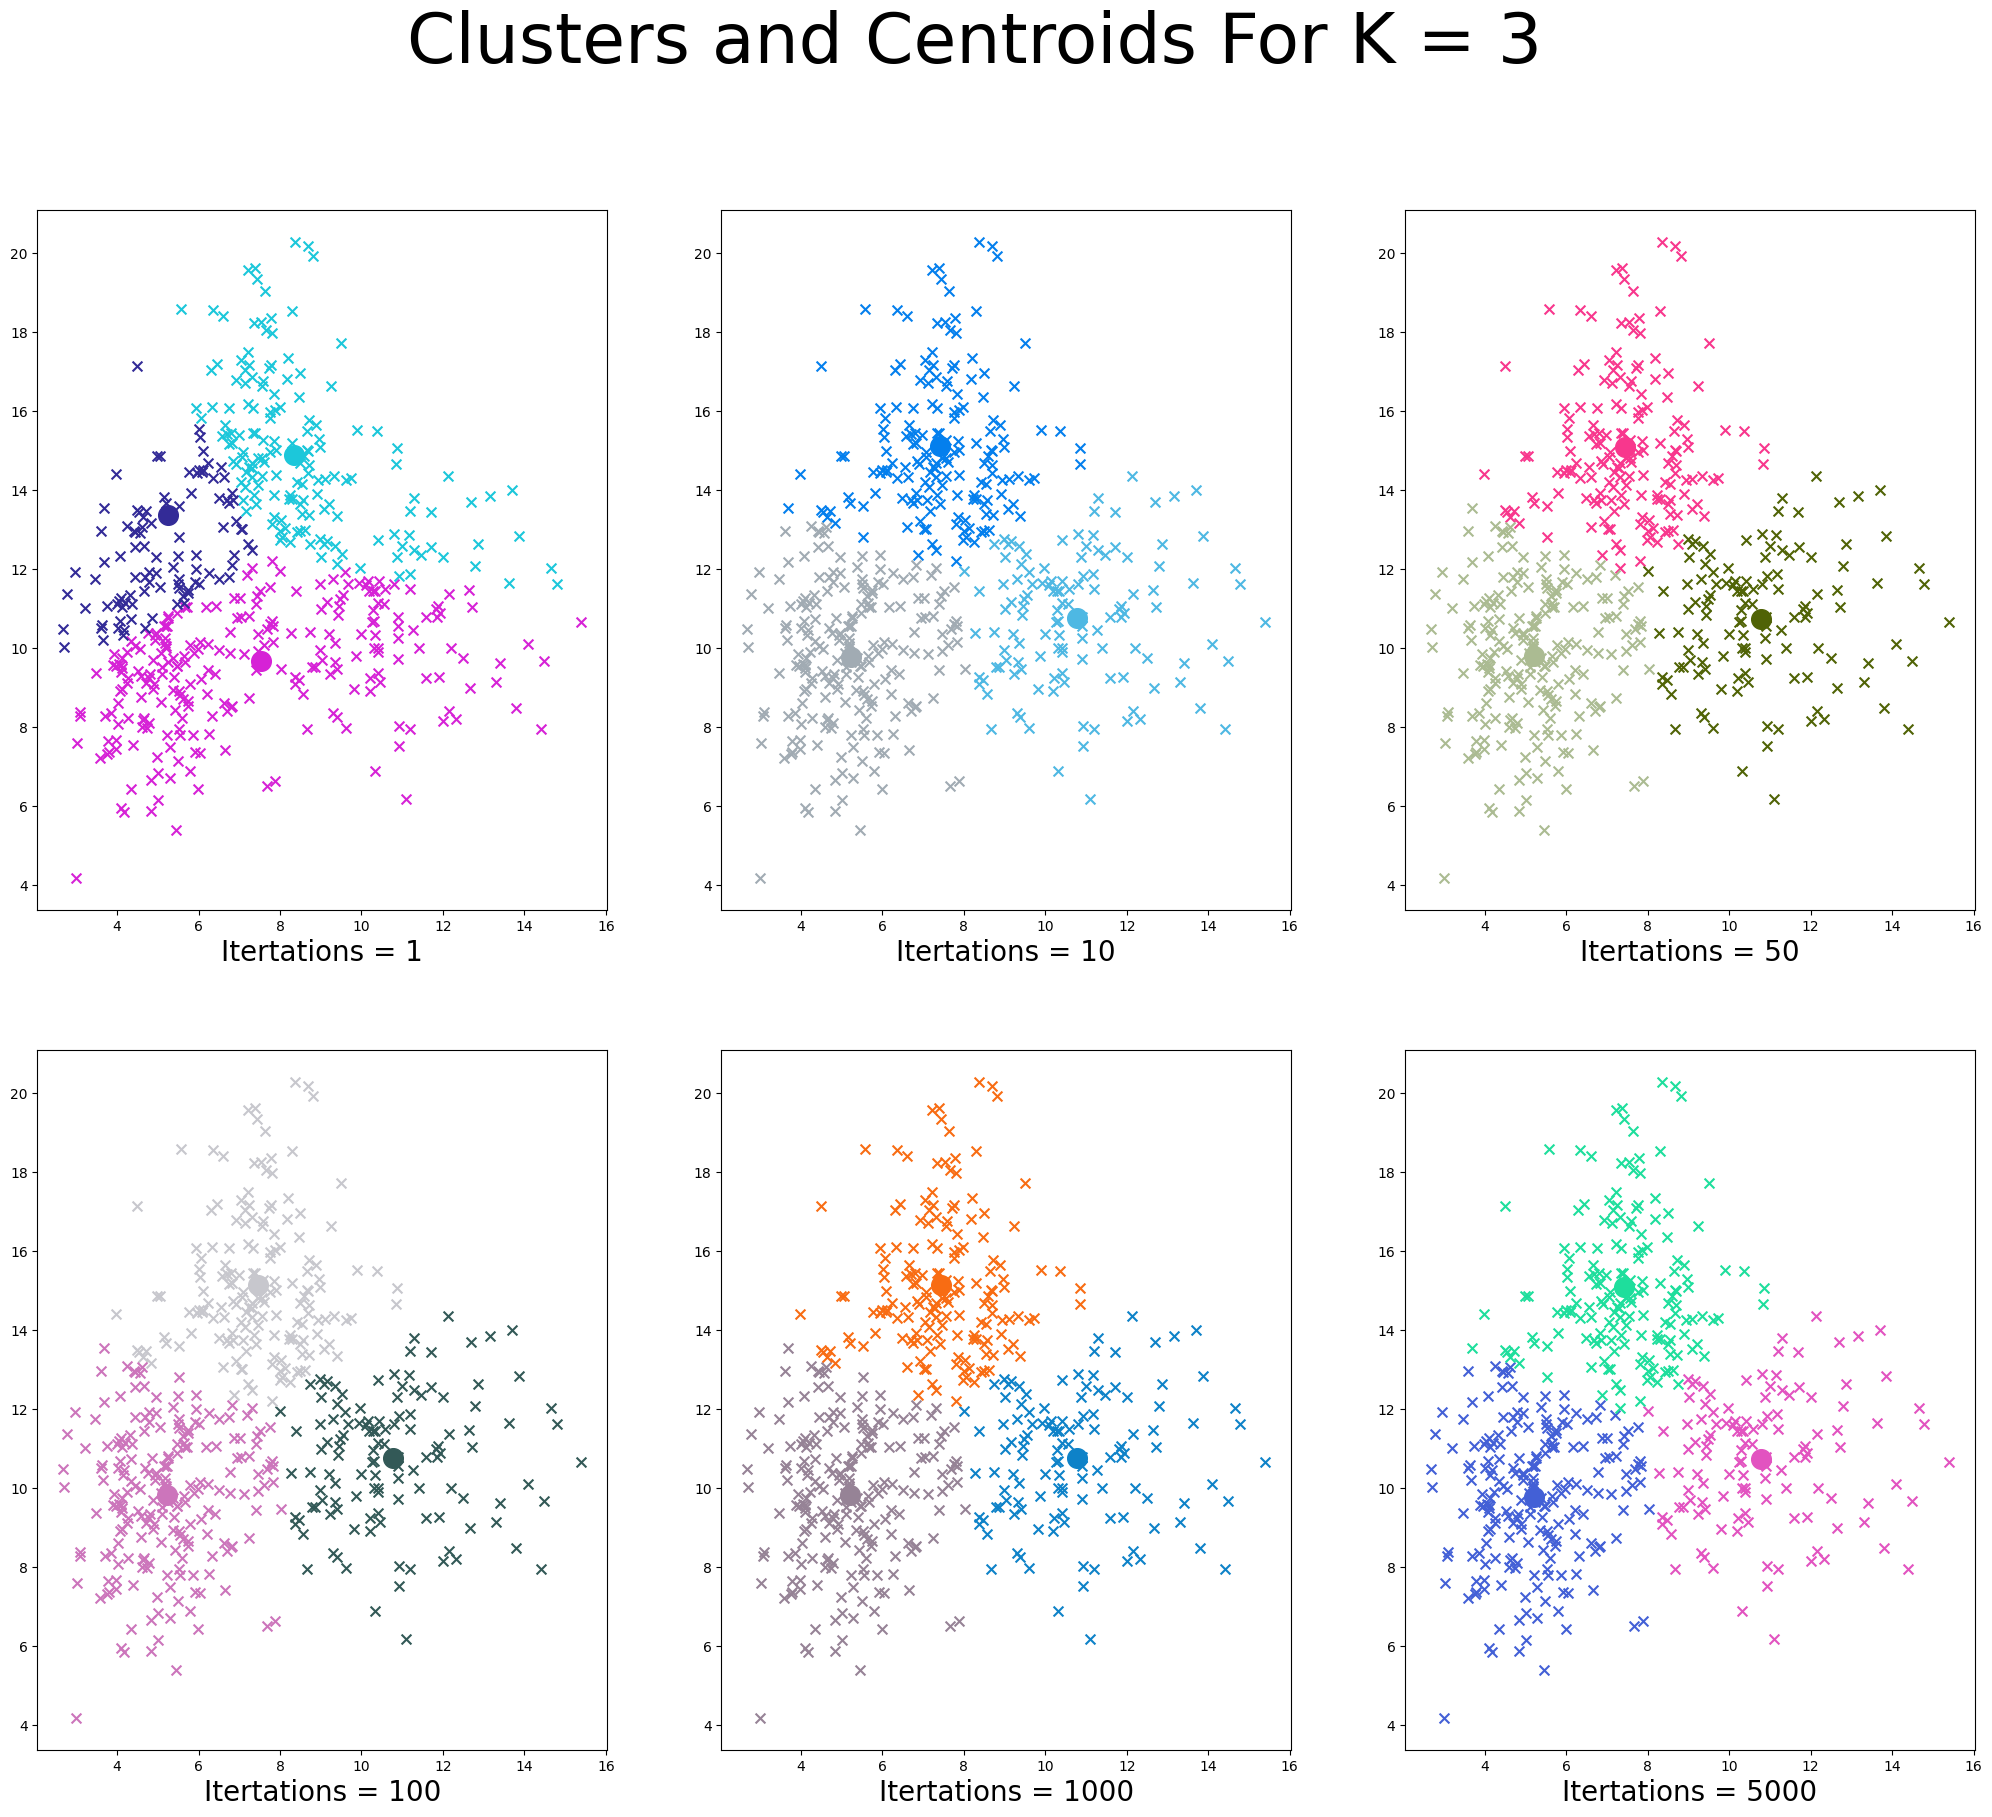

In [48]:
fig, ax = plt.subplots(2,3,figsize=(25,20))
iterations_list = [1,10,50,100,1000,5000]
k = 3
for n_iter,axi in zip(iterations_list,ax.flatten()):
    model = Kmeans(num_clusters=k,max_iter=n_iter)
    model.fit(features_matrix)
    centroids = model.get_centroids()
    cluster_labels = model.predict_labels(features_matrix)
    for j in range(0,k):
        color = np.random.rand(3,)
        dpoints = features_matrix[cluster_labels==j]
        axi.scatter(dpoints[:,0],dpoints[:,1],marker="x",s=50,c=color.reshape(1,-1))
        axi.scatter(centroids[j,0],centroids[j,1],marker="o",s=200,c=color.reshape(1,-1)) #plot points
        axi.set_xlabel("Itertations = " + str(n_iter),size=20)
fig.suptitle("Clusters and Centroids For K = " + str(k) ,size=50) 
    
print("\n")
print("After 5000 Iterations, Cluster Labels for Data: \n",cluster_labels)
print("\n")

In [63]:
print("Initial k means are")
print('means[0] is(',centroids[0],',0)''\n''means[1] is(',centroids[1],',1)''\n''means[2] is(',centroids[2],',2)')

Initial k means are
means[0] is( [5.20980769 9.77475962] ,0)
means[1] is( [10.79162602 10.73878049] ,1)
means[2] is( [ 7.42214286 15.08434524] ,2)


In [81]:
from collections import Counter, defaultdict
print(Counter(cluster_labels))
print('Size of cluster 0 (label 1) is :123 \n Size of cluster 1 (label 0) is :208 \n Size of cluster 2 (label 2) is : 168' )

Counter({0: 208, 2: 168, 1: 123})
Size of cluster 0 (label 1) is :123 
 Size of cluster 1 (label 0) is :208 
 Size of cluster 2 (label 2) is : 168


In [99]:
y_df= pd.read_csv(r'C:\Users\dell\Desktop\y.csv')
from sklearn import metrics
score = metrics.accuracy_score(cluster_labels,y_df)
print('accurancy rate is :')
print(round(score,2)*100,'%')

accurancy rate is :
88.0 %
